In [1]:
# USER: Change the path below to point to your local copy of ImageD11:

import os

home_dir = !echo $HOME
home_dir = str(home_dir[0])

# USER: You can change this location if you want

id11_code_path = os.path.join(home_dir, "Code/ImageD11")

import sys

sys.path.insert(0, id11_code_path)

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from ImageD11.sinograms import geometry

%matplotlib inline

In [3]:
# let's define a circular sample of radius 600 um
sample_radius = 600

# the sample is perfectly aligned to the rotation axis

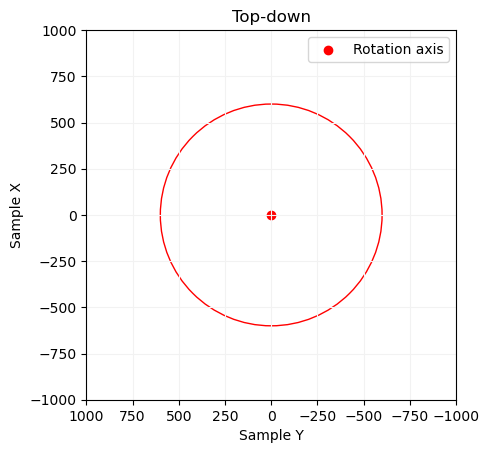

In [4]:
fig, ax = plt.subplots()
ax.scatter(0, 0, label='Rotation axis', c='r')
ax.set_xlim(1000, -1000)
ax.set_ylim(-1000, 1000)
ax.set_aspect(1)
ax.set_xlabel("Sample Y")
ax.set_ylabel("Sample X")
ax.legend()
ax.set_title("Top-down")
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
circle1 = plt.Circle((0, 0), sample_radius, color='r', fill=False)
ax.add_patch(circle1)
plt.show()

In [5]:
# we have 1 grain in our sample
# grain centre-of-mass position is [-300, 400, 0] um in the sample frame

sample_x = 300.0
sample_y = 400.0
sample_z = 0

pos_sample = np.array([sample_x, sample_y, sample_z])

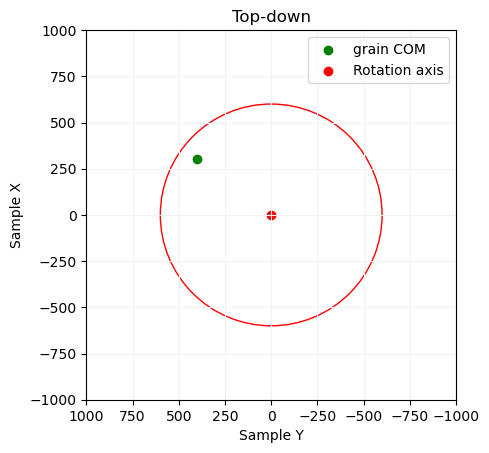

In [6]:
fig, ax = plt.subplots()
ax.scatter(pos_sample[1], pos_sample[0], label='grain COM', c='g')
ax.scatter(0, 0, label='Rotation axis', c='r')
ax.set_xlim(1000, -1000)
ax.set_ylim(-1000, 1000)
ax.set_aspect(1)
ax.set_xlabel("Sample Y")
ax.set_ylabel("Sample X")
ax.legend()
ax.set_title("Top-down")
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
circle1 = plt.Circle((0, 0), sample_radius, color='r', fill=False)
ax.add_patch(circle1)
plt.show()

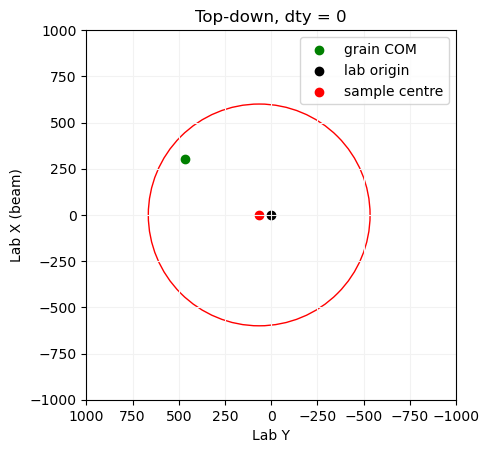

In [7]:
# let's assume that we didn't reset the position of dty
# so there's an offset
# at dty = 0, the centre of the sample does not intercept the beam
# this instead happens at dty = -65 um
# therefore y0 = -65
y0 = -65

pos_lab = pos_sample.copy()
pos_lab[1] = pos_lab[1] - y0

fig, ax = plt.subplots()
ax.scatter(pos_lab[1], pos_lab[0], label='grain COM', c='g')
ax.scatter(0, 0, label='lab origin', c='k')
ax.scatter(-y0, 0, label='sample centre', c='r')
ax.set_xlim(1000, -1000)
ax.set_ylim(-1000, 1000)
ax.set_aspect(1)
ax.set_xlabel("Lab Y")
ax.set_ylabel("Lab X (beam)")
ax.legend()
ax.set_title("Top-down, dty = 0")
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
circle1 = plt.Circle((-y0, 0), sample_radius, color='r', fill=False)
ax.add_patch(circle1)
plt.show()

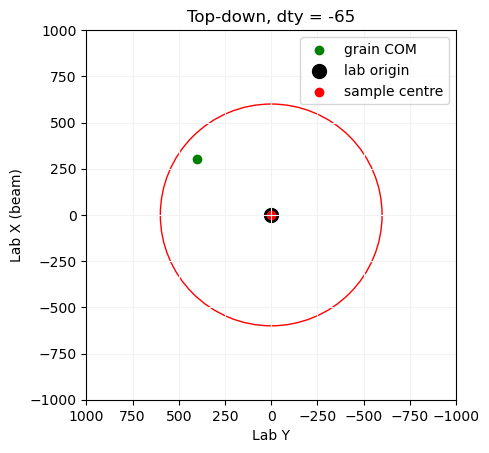

In [8]:
fig, ax = plt.subplots()
ax.scatter(pos_lab[1] + y0, pos_lab[0], label='grain COM', c='g')
ax.scatter(0, 0, label='lab origin', c='k', s=100)
ax.scatter(0, 0, label='sample centre', c='r')
ax.set_xlim(1000, -1000)
ax.set_ylim(-1000, 1000)
ax.set_aspect(1)
ax.set_xlabel("Lab Y")
ax.set_ylabel("Lab X (beam)")
ax.legend()
ax.set_title("Top-down, dty = -65")
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
circle1 = plt.Circle((0, 0), sample_radius, color='r', fill=False)
ax.add_patch(circle1)
plt.show()

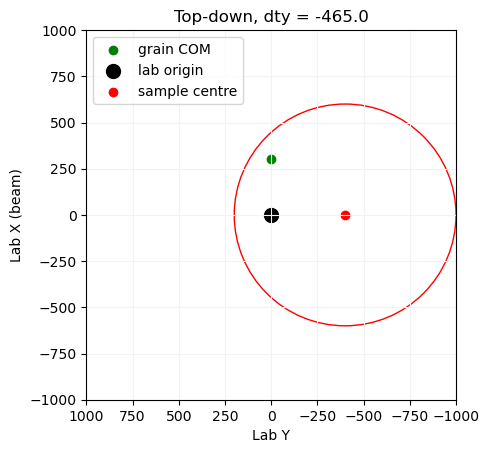

In [9]:
# To get the grain into the beam at omega = 0?

fig, ax = plt.subplots()
ax.scatter(pos_lab[1] + y0 - sample_y, pos_lab[0], label='grain COM', c='g')
ax.scatter(0, 0, label='lab origin', c='k', s=100)
ax.scatter(-sample_y, 0, label='sample centre', c='r')
ax.set_xlim(1000, -1000)
ax.set_ylim(-1000, 1000)
ax.set_aspect(1)
ax.set_xlabel("Lab Y")
ax.set_ylabel("Lab X (beam)")
ax.legend()
ax.set_title(f"Top-down, dty = {y0 - sample_y}")
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
circle1 = plt.Circle((-sample_y, 0), sample_radius, color='r', fill=False)
ax.add_patch(circle1)
plt.show()

In [10]:
# check the co-ordinate systems

# let's assume we measured this sample from -750 to +750 um in dty, with a dty step of 10
ystep = 10  # microns
ymin = -750
ymax = 750

yrange = ymax - ymin
ny = int(yrange // ystep) + 1
ybincens = np.linspace(ymin, ymax, ny)

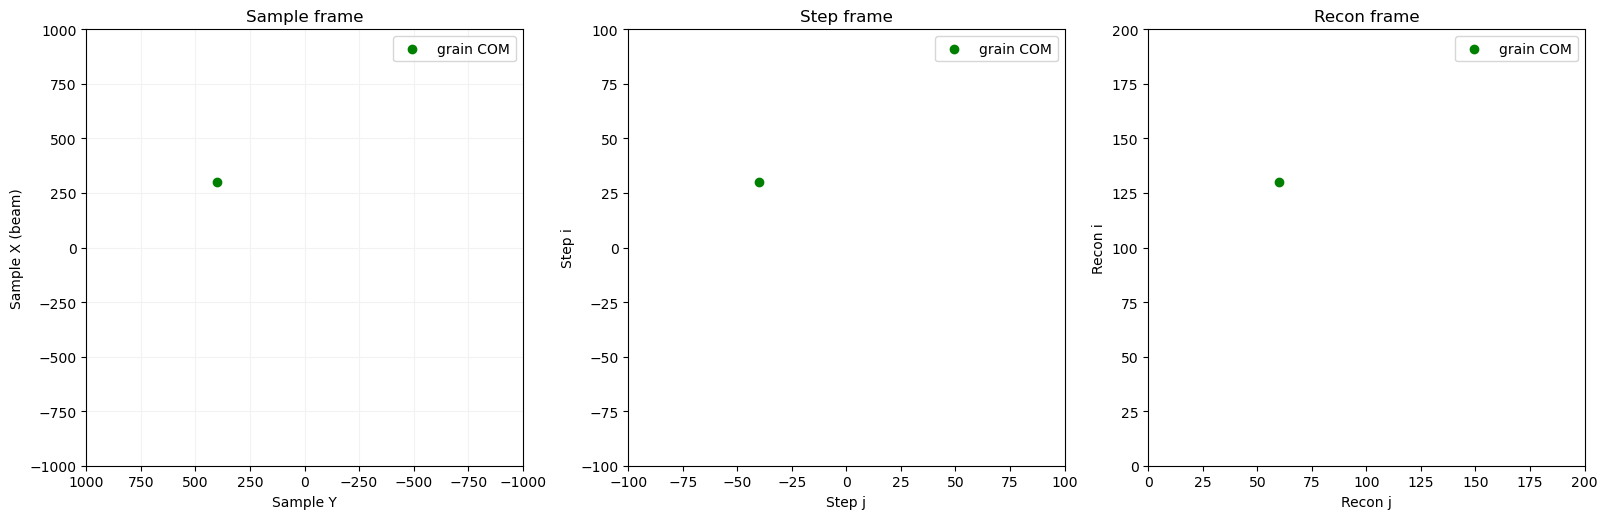

In [11]:
pos_step = geometry.sample_to_step(*pos_sample[0:2], ystep=ystep)
pos_recon = geometry.sample_to_recon(*pos_sample[0:2], ystep=ystep, recon_shape=(200, 200))

fig, axs = plt.subplots(1, 3, figsize=(16, 5), layout="constrained")
axs[0].scatter(pos_sample[1], pos_sample[0], label='grain COM', c='g')
axs[0].set_xlim(1000, -1000)
axs[0].set_ylim(-1000, 1000)
axs[0].set_aspect(1)
axs[0].set_xlabel("Sample Y")
axs[0].set_ylabel("Sample X (beam)")
axs[0].legend()
axs[0].set_title("Sample frame")
axs[0].grid(axis='x', color='0.95')
axs[0].grid(axis='y', color='0.95')

axs[1].scatter(pos_step[1], pos_step[0], label='grain COM', c='g')
axs[1].set_xlim(-1000/ystep, 1000/ystep)
axs[1].set_ylim(-1000/ystep, 1000/ystep)
axs[1].set_aspect(1)
axs[1].set_xlabel("Step j")
axs[1].set_ylabel("Step i")
axs[1].legend()
axs[1].set_title("Step frame")


axs[2].scatter(pos_recon[1], pos_recon[0], label='grain COM', c='g')
axs[2].set_xlim(0, 200)
axs[2].set_ylim(0, 200)
axs[2].set_aspect(1)
axs[2].set_xlabel("Recon j")
axs[2].set_ylabel("Recon i")
axs[2].legend()
axs[2].set_title("Recon frame")

plt.show()

In [12]:
# how does the grain's sinogram look?
# omega is counter-clockwise (CCW) when looking down at the diffractometer

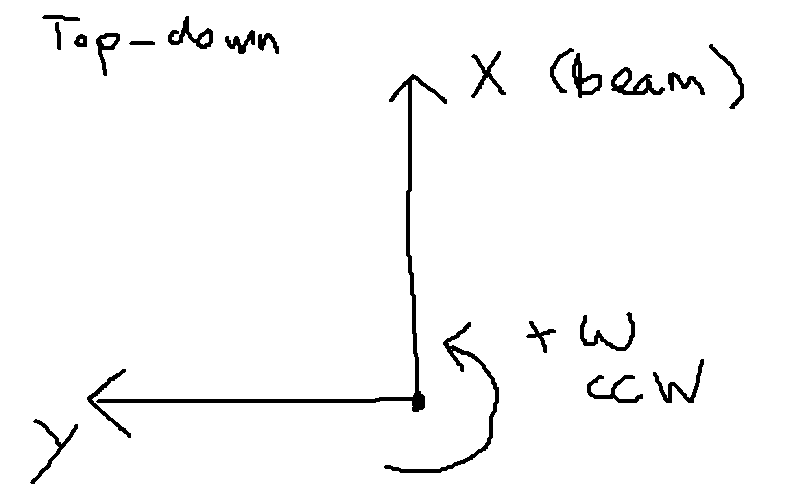

In [13]:
# This means the sinogram should start positive and begin decreasing as we increase omega

In [14]:
# how would our sinogram look?

omega = np.arange(0, 180, 1)  # 1 degree step

In [15]:
# compute our dty values from omega and the grain position

dty = geometry.x_y_y0_omega_to_dty(omega, pos_sample[0], pos_sample[1], y0)

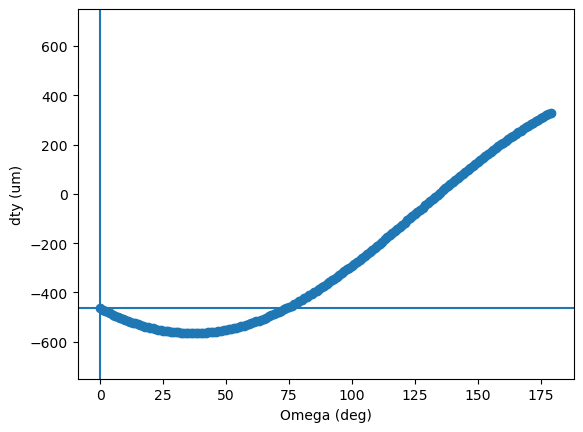

In [16]:
fig, ax = plt.subplots()
ax.scatter(omega, dty)
ax.set_xlabel("Omega (deg)")
ax.set_ylabel("dty (um)")
ax.set_ylim(-750, 750)

# grain is a 3,4,5 triangle
# at omega = 0, sample should be in the beam when dty is at (-sample_y) + y0

plt.axhline(y0 - sample_y)  # dty
plt.axvline(0)  # omega
plt.show()

In [17]:
# can we recover the lab position from the sinogram?

In [18]:
x_calc, y_calc, y0_calc = geometry.dty_omega_to_x_y_y0(dty, omega)


print(y0_calc, x_calc, y_calc)
print(y0, pos_sample)

-65.00000000005464 299.99999999983055 400.00000000000205
-65 [300. 400.   0.]


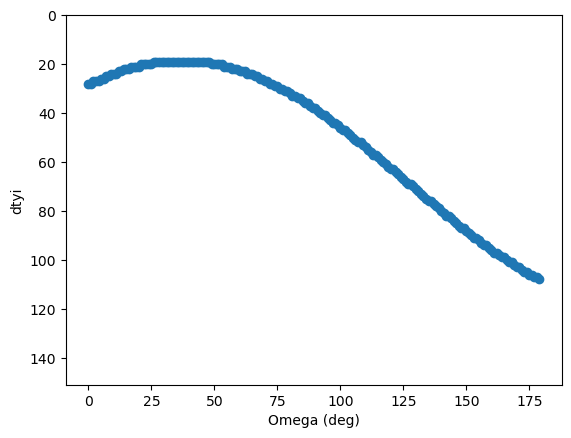

In [19]:
# let's investigate dtyi
# negative values of dty get scanned first
# flip vertical axis to match sinogram

dtyi = geometry.dty_to_dtyi_for_sinogram(dty, ystep, ybincens[0])

fig, ax = plt.subplots()
ax.scatter(omega, dtyi)
ax.set_xlabel("Omega (deg)")
ax.set_ylabel("dtyi")
ax.set_ylim(ny, 0)

plt.show()

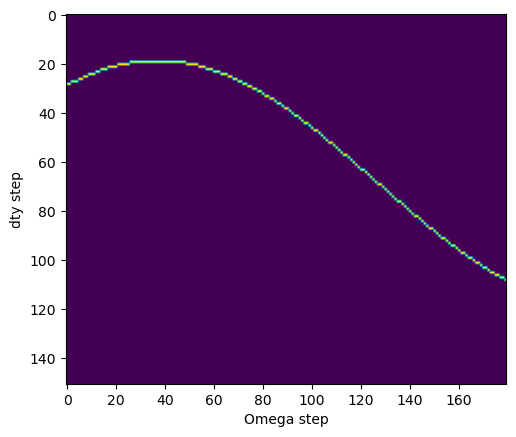

In [20]:
# now let's come up with a sinogram image
# we will determine it from ystep and omega

sino = np.zeros((ny, len(omega)), dtype=float)

for i in range(sino.shape[0]):  # ny
    for j in range(sino.shape[1]):  # omega
        # use dtyi_calc as a lookup table from omega index
        this_dtyi = dtyi[j]
        sino[i, j] = 1/(50*np.cbrt((np.abs(i - this_dtyi)))+0.01)

fig, ax = plt.subplots()
ax.imshow(sino, aspect=1)
ax.set_xlabel("Omega step")
ax.set_ylabel("dty step")
plt.show()


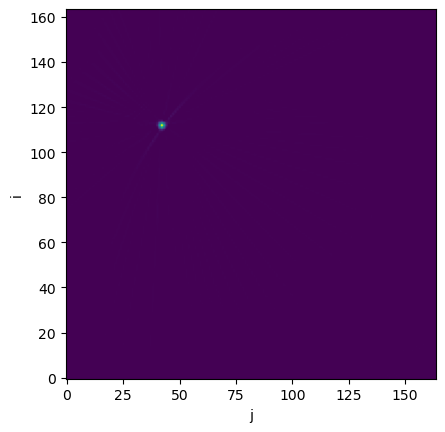

In [21]:
from ImageD11.sinograms.roi_iradon import run_iradon

# projection shifts is in units of pixels

shift = -y0/ystep

recon = run_iradon(sino, omega, pad=13, shift=shift)

fig, ax = plt.subplots()
ax.imshow(recon, vmin=0, origin="lower")
ax.set_ylabel("i")
ax.set_xlabel("j")
plt.show()

In [22]:
recon.shape

(164, 164)

In [23]:
# can we now go from recon space back to real space?

ri, rj = np.where(recon == recon.max())
ri = ri[0]
rj = rj[0]

print(ri, rj)

112 42


In [24]:
print(geometry.recon_to_sample(ri, rj, recon.shape, ystep))
print(sample_x, sample_y)

(300, 400)
300.0 400.0


In [25]:
print(geometry.sample_to_recon(sample_x, sample_y, recon.shape, ystep))
print(ri, rj)

(112.0, 42.0)
112 42


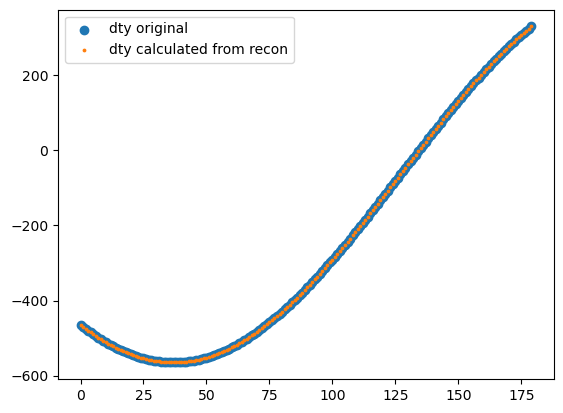

In [26]:
# convert reconstruction coordinates to (x, y)
# calulate dty from that

dty_calc = geometry.recon_omega_to_dty(ri, rj, omega, y0, recon.shape, ystep)

fig, ax = plt.subplots()
ax.scatter(omega, dty, label='dty original')
ax.scatter(omega, dty_calc, label='dty calculated from recon', s=3)
ax.legend()
plt.show()

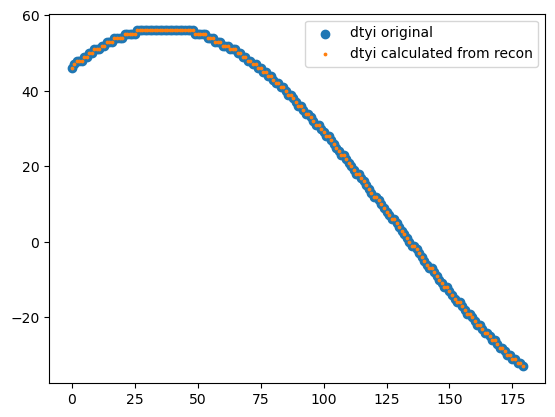

In [27]:
dtyi_desired = geometry.dty_to_dtyi(dty, ystep)
dtyi_calc = geometry.recon_omega_to_dtyi(ri, rj, omega, y0, recon.shape, ystep)

fig, ax = plt.subplots()
ax.scatter(omega, dtyi_desired, label='dtyi original')
ax.scatter(omega, dtyi_calc, label='dtyi calculated from recon', s=3)
ax.legend()
# ax.set_ylim(ny, 0)
plt.show()